Order_ID: Unique identifier for each order.

Distance_km: The delivery distance in kilometers.

Weather: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.

Traffic_Level: Traffic conditions categorized as Low, Medium, or High.

Time_of_Day: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.

Vehicle_Type: Type of vehicle used for delivery, including Bike, Scooter, and Car.

Preparation_Time_min: The time required to prepare the order, measured in minutes.

Courier_Experience_yrs: Experience of the courier in years.

Delivery_Time_min: The total delivery time in minutes (target variable).

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!ls

Food_Delivery_Times.csv  Untitled.ipynb


In [6]:
df = pd.read_csv('Food_Delivery_Times.csv')

In [7]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [9]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [10]:
df.describe(include='object')

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
count,970,970,970,1000
unique,5,3,4,3
top,Clear,Medium,Morning,Bike
freq,470,390,308,503


In [11]:
df.duplicated().sum()

0

# Передобробка даних

In [12]:
df.columns = [i.lower() for i in df.columns]
df.head()

,order_id,distance_km,weather,traffic_level,time_of_day,vehicle_type,preparation_time_min,courier_experience_yrs,delivery_time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [13]:
df.isna().sum()

order_id                   0
distance_km                0
weather                   30
traffic_level             30
time_of_day               30
vehicle_type               0
preparation_time_min       0
courier_experience_yrs    30
delivery_time_min          0
dtype: int64

In [14]:
df[df['courier_experience_yrs'].isna()]

,order_id,distance_km,weather,traffic_level,time_of_day,vehicle_type,preparation_time_min,courier_experience_yrs,delivery_time_min
14,939,2.80,Clear,High,Morning,Scooter,10,NaN,33
24,211,11.20,Clear,Medium,Morning,Bike,23,NaN,73
42,313,0.99,NaN,Medium,Evening,Bike,15,NaN,32
90,383,12.76,Windy,High,Morning,Scooter,27,NaN,74
110,529,1.60,Foggy,Low,Night,Scooter,24,NaN,37
128,868,4.05,Clear,Medium,Evening,Bike,20,NaN,44
185,138,14.21,Clear,Medium,Evening,Bike,24,NaN,58
231,995,7.54,Snowy,Low,Afternoon,Bike,20,NaN,55
260,732,16.38,Rainy,Medium,Night,Bike,7,NaN,90
271,119,17.90,Clear,Low,Morning,Bike,23,NaN,85


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1000 non-null   int64  
 1   distance_km             1000 non-null   float64
 2   weather                 970 non-null    object 
 3   traffic_level           970 non-null    object 
 4   time_of_day             970 non-null    object 
 5   vehicle_type            1000 non-null   object 
 6   preparation_time_min    1000 non-null   int64  
 7   courier_experience_yrs  970 non-null    float64
 8   delivery_time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [72]:
def feature_distribution(df, target_column, dtype='object'):
    if dtype != 'object':
        columns = ['distance_km', 'courier_experience_yrs', 'delivery_time_min']
        bins = 30
        alpha = 0.5
        for i in columns:
            if target_column == i:
                continue
            plt.hist(df[df[target_column].notna()][i], bins=bins, alpha=alpha, density=True, label=f'{target_column}, notna')
            plt.hist(df[df[target_column].isna()][i], bins=bins, alpha=alpha, density=True, label=f'{target_column} isna')
            plt.title(f'Розподіл {i}')
            plt.xlabel(i)
            plt.legend()
            plt.show()
    else:
        columns = ['weather', 'traffic_level', 'time_of_day', 'vehicle_type']
        width = 0.4
        for i in columns:
            if target_column == i:
                continue
            notna = df[df[target_column].notna()][i].value_counts(normalize=True)
            isna = df[df[target_column].isna()][i].value_counts(normalize=True)

            notna.plot(kind='bar', width=width, color='b', position=0, label=f'{target_column}, notna')
            isna.plot(kind='bar', width=width, color='r', position=1, label=f'{target_column} isna')
            plt.title(f'Розподіл {i}')
            plt.xlabel(i)
            plt.legend()
            plt.show()

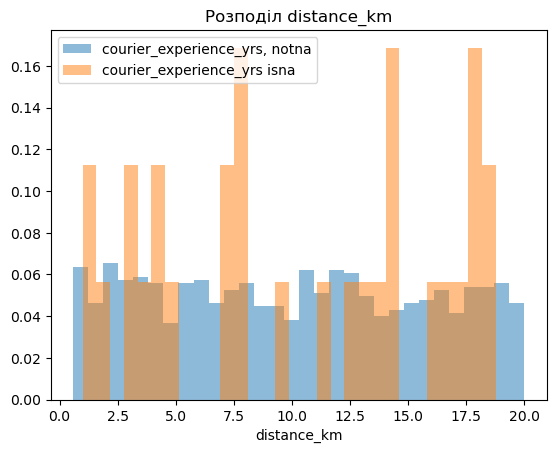

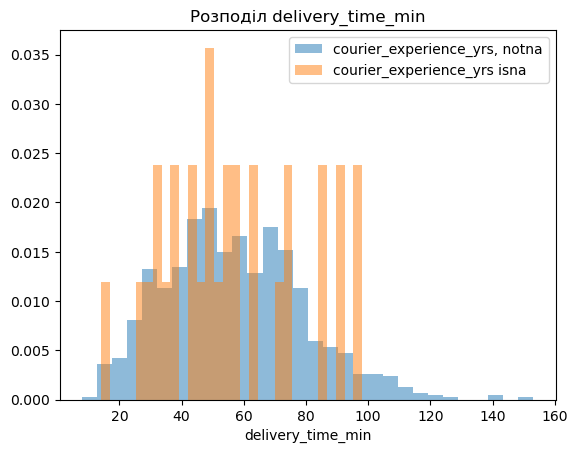

In [74]:
feature_distribution(df, 'courier_experience_yrs', dtype='')

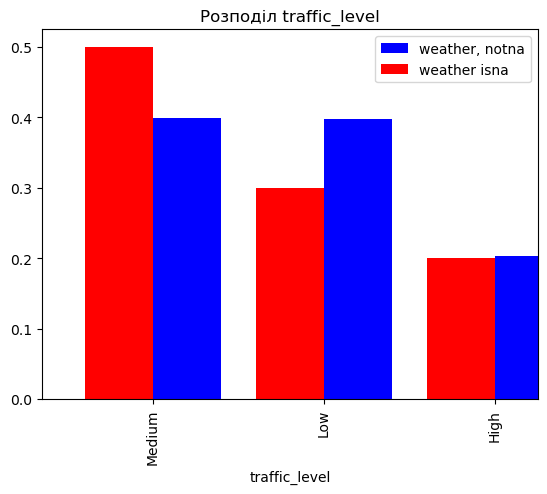

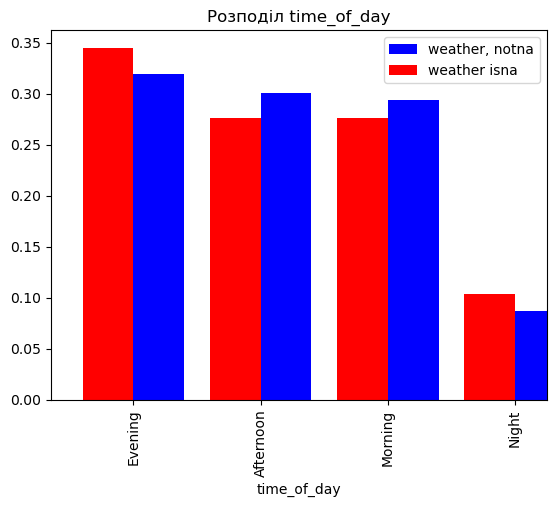

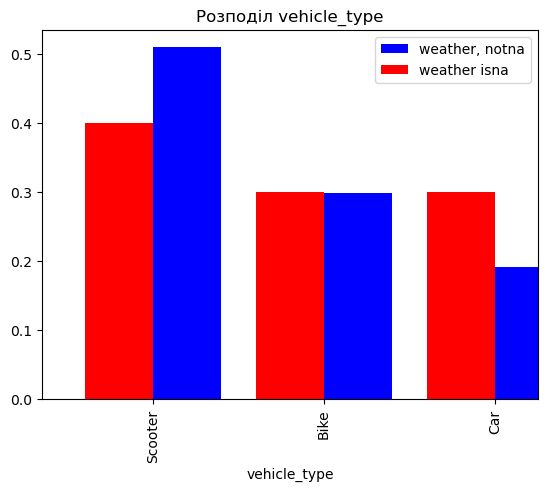

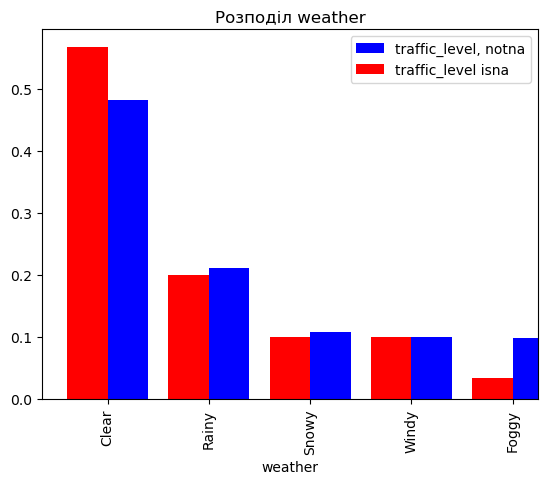

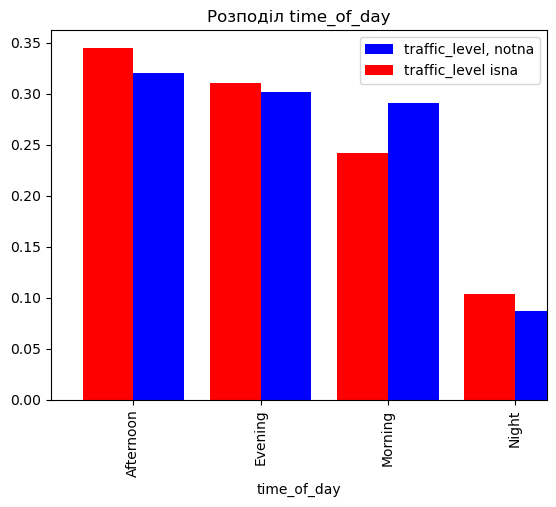

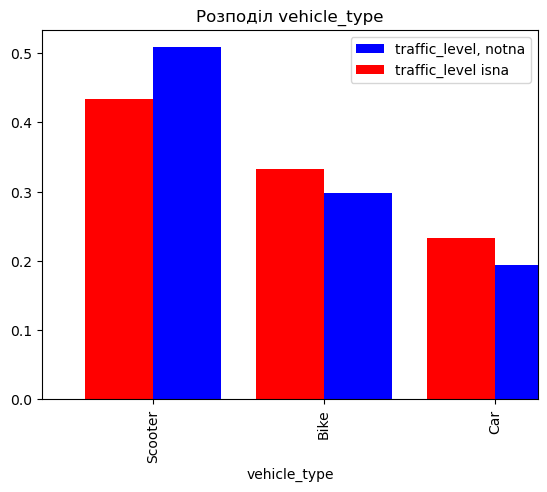

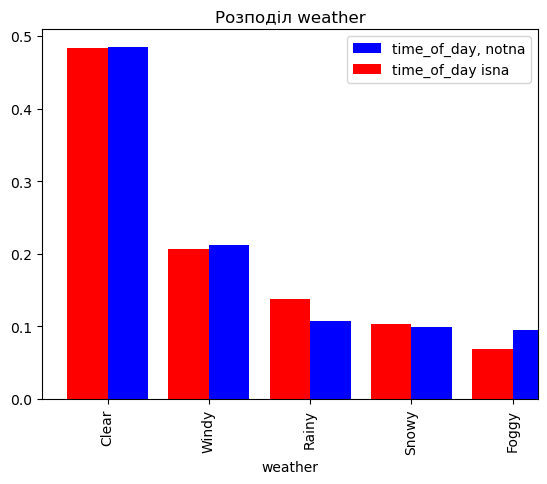

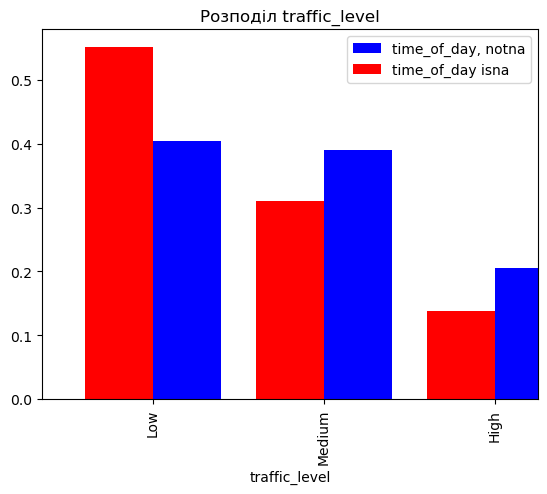

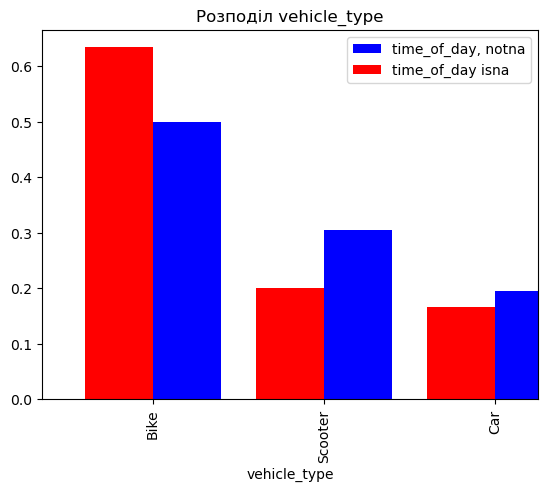

In [70]:
for i in ['weather', 'traffic_level', 'time_of_day']:
    feature_distribution(df, i)

Закономірностей у пропусках немає. Замінимо nan значення середніми для кількісних даних і модою для категоріальних.

In [87]:
for i in ['weather', 'traffic_level', 'time_of_day', 'courier_experience_yrs']:
    if df[i].dtype == 'O':
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].mean())

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1000 non-null   int64  
 1   distance_km             1000 non-null   float64
 2   weather                 1000 non-null   object 
 3   traffic_level           1000 non-null   object 
 4   time_of_day             1000 non-null   object 
 5   vehicle_type            1000 non-null   object 
 6   preparation_time_min    1000 non-null   int64  
 7   courier_experience_yrs  1000 non-null   float64
 8   delivery_time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [92]:
df.drop('order_id', axis=1, inplace=True)

# Аналіз даних

In [93]:
df.head()

,distance_km,weather,traffic_level,time_of_day,vehicle_type,preparation_time_min,courier_experience_yrs,delivery_time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [132]:
categories = df['weather'].unique()
colors = plt.cm.tab10(range(len(categories)))  # Choose a colormap
color_map = dict(zip(categories, colors))

color_map

{'Windy': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'Clear': array([1.        , 0.49803922, 0.05490196, 1.        ]),
 'Foggy': array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 'Rainy': array([0.83921569, 0.15294118, 0.15686275, 1.        ]),
 'Snowy': array([0.58039216, 0.40392157, 0.74117647, 1.        ])}

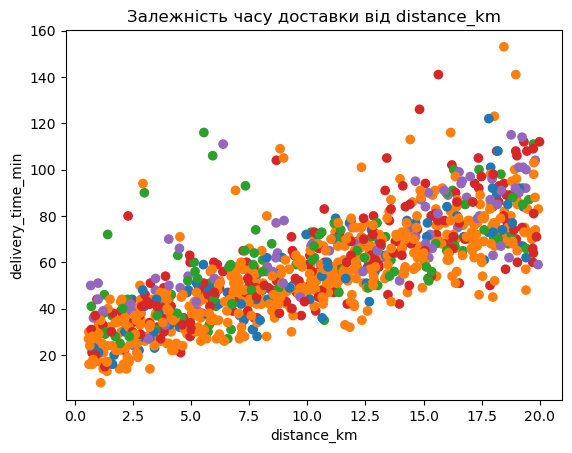

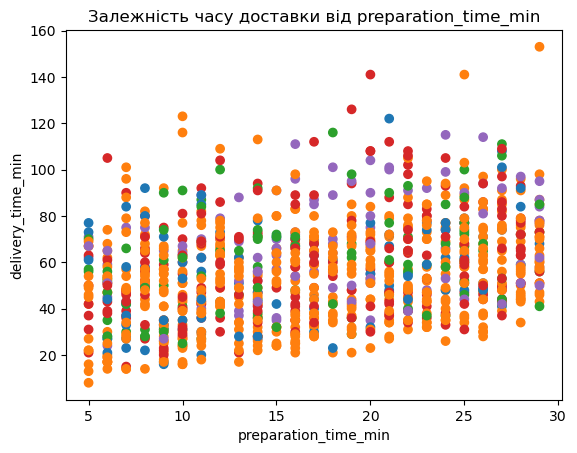

In [133]:
for i in ['distance_km', 'preparation_time_min']:
    plt.scatter(df[i], df['delivery_time_min'], color=df['weather'].map(color_map))

    plt.title(f'Залежність часу доставки від {i}')
    plt.xlabel(i)
    plt.ylabel('delivery_time_min')
    
    plt.show();